### **Multiclass Classification using ANN (MNIST dataset)**
####  *It is one of the most popular datasets in machine learning and computer vision, particularly for image classification tasks.
####  *It is commonly used to test and benchmark machine learning models, especially for handwritten digit recognition.

## ** Summary of the MNIST Dataset:
#### Purpose:

* The dataset is primarily used for training models to recognize handwritten digits (0-9).
* It's a simple yet powerful benchmark dataset for testing classification algorithms.
  
### Data Composition:

#### Number of Samples:

* Training set: 60,000 images.
* Test set: 10,000 images.
* Image Size: Each image is a 28x28 pixel grayscale image.
* Total number of pixels per image: 784 pixels (28 × 28).
* Labels: Each image is associated with a label (a digit between 0 and 9), indicating which digit the image represents.
  
#### Format:

* Each image in the dataset is represented as a 2D array of pixel intensities.
* The pixel values range from 0 (black) to 255 (white).
* In machine learning tasks, this 2D array is often flattened into a 1D array of size 784 (28 x 28).

#### Import the necessary libraries

In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

#### We'll import MNIST dataset from KERAS (pre-built)

In [6]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [7]:
X_train.shape 
 # here 600000 : refers to the no. of images
 #       28,28 : refers to the size of pixels which is 28*28= 784

(60000, 28, 28)

In [8]:
X_test.shape
# here 10,000 : refers to the no. of images
 #       28,28 : refers to the size of pixels which is 28*28= 784

(10000, 28, 28)

In [9]:
y_train

# 5,0,4..... refers to the actual image formed from 28x28 pixels combined i.e 5 means image is actually a 5

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

####  Use matplot.lib in order to view the actual image formed by pixels combined in the order 28 x 28

In [11]:
import matplotlib.pyplot as plt

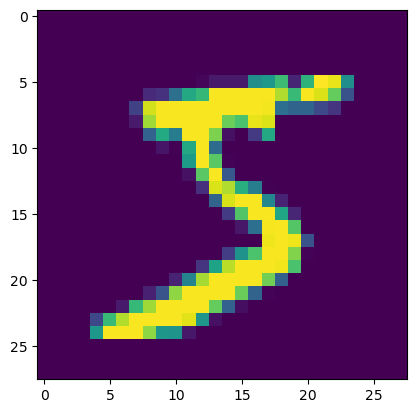

In [12]:
plt.imshow(X_train[0])   # 0 here means we're fetching the 1st photo from X_train

#### * The above image is represented as a 2D array of pixel intensities 784 (28 x 28).
#### * The pixel values range from 0 (purple) to 255 (yellow).


In [14]:
X_train[0] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

####  In the above 2D array: Values between 0 and 255 represent varying shades of gray:

####  * Lower values (e.g., 50, 100) are closer to black.

####  * Higher values (e.g., 200, 250) are closer to white

_____________________________________________________________

#### ANN works efficiently if the values are in similar range, so for that we'll convert our data set in this form by dividing with the maximum number i.e 255 in our data set which will bring it down in the range [0,1]

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Building ANN model

In [21]:
model = Sequential()

#### Before we proceed with building our model we've to flatten our data.

** Flattening converts 28x28 pixel images (2D) into a 1D array of 784 values, retaining pixel information to make the data suitable for fully connected layers in a neural network.*


In [23]:
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))  # softmax is used when when dealing with multi-class classification problems.

C:\Users\Akarshan Kapoor\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer ='Adam', metrics =['accuracy']) 
# Sparse Categorical Crossentropy is useful here cuz labels are integers rather than one-hot encoded vectors.

### Model training & prediction

In [27]:
history = model.fit(X_train,y_train, epochs =25, validation_split = 0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8518 - loss: 0.4915 - val_accuracy: 0.9571 - val_loss: 0.1481
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9643 - loss: 0.1205 - val_accuracy: 0.9658 - val_loss: 0.1159
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9755 - loss: 0.0794 - val_accuracy: 0.9695 - val_loss: 0.1031
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9817 - loss: 0.0597 - val_accuracy: 0.9743 - val_loss: 0.0921
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9868 - loss: 0.0438 - val_accuracy: 0.9728 - val_loss: 0.0969
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9885 - loss: 0.0350 - val_accuracy: 0.9686 - val_loss: 0.1106
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9915 - loss: 0.0275 - val_accuracy: 0.9713 - val_loss: 0.1100
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9932 - loss: 0.0218 - 

In [28]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step


In [29]:
y_prob  

array([[1.0899919e-15, 2.5803517e-11, 2.2186003e-12, ..., 1.0000000e+00,
        6.1135413e-20, 2.9226366e-09],
       [2.3960718e-19, 1.1098532e-10, 1.0000000e+00, ..., 1.8473799e-25,
        2.4741586e-20, 3.5790384e-28],
       [1.4749537e-14, 9.9999988e-01, 6.1923189e-10, ..., 1.4736843e-08,
        2.3713087e-10, 1.2553312e-12],
       ...,
       [1.0640875e-32, 1.2267390e-18, 1.6564592e-27, ..., 1.5937097e-15,
        2.2435891e-19, 8.0478497e-12],
       [7.9573129e-18, 1.5332951e-20, 6.5440928e-23, ..., 4.1527342e-23,
        1.1121239e-08, 5.2732247e-18],
       [1.6305273e-22, 1.5114630e-23, 5.5322584e-19, ..., 6.1892445e-34,
        1.1611160e-19, 8.5704466e-29]], dtype=float32)

#### Since our model's prediction contains probability distribution. We'll use argmax on the model's output to determine which digit (from 0 to 9) the model predicts for a given input image. 

In [31]:
y_pred = y_prob.argmax(axis = 1) 

In [32]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.98

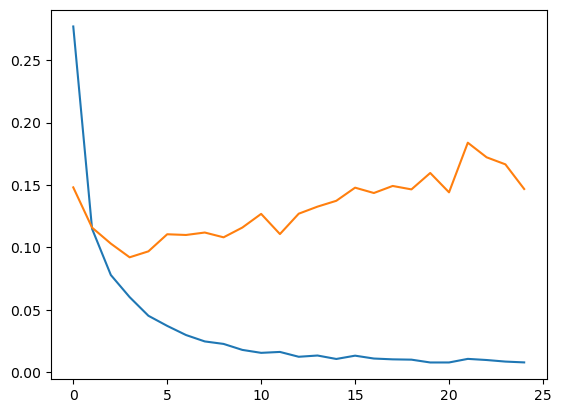

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

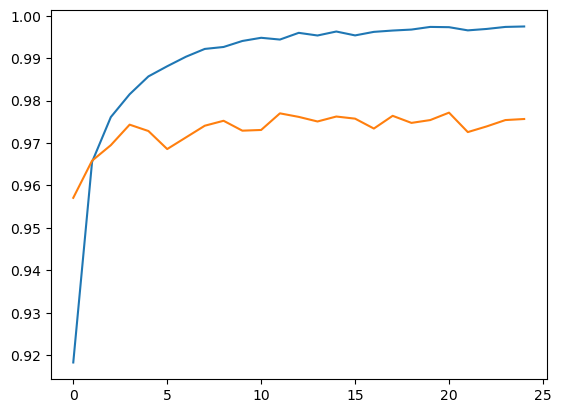

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

#### Prediction on Test data

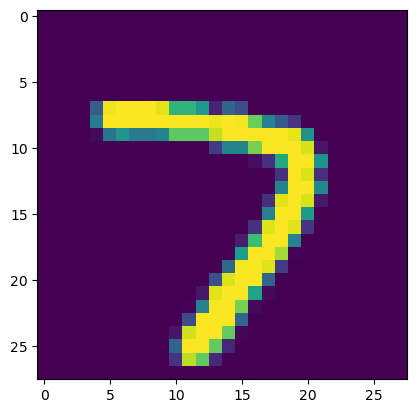

In [37]:
plt.imshow(X_test[17]) #checking the image beforehand

In [38]:
model.predict(X_test[17].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([7], dtype=int64)

#### which is predicted accurately by the model